## PRÀCTICA XNDL

Abril Risso i Anna Casanovas

In [155]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [156]:
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score

In [157]:
path_rain_data = "rain_data.csv"
rain_data = pd.read_csv(path_rain_data, header=0, delimiter=',')

In [158]:
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
1,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
2,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
3,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
4,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes


## 1. ANÀLISI EXPLORATÒRIA DE DADES

In [61]:
rain_data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [159]:
data = rain_data

In [160]:
print(data.shape)
print(data.columns)

(67021, 23)
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


### ANÀLISI UNIVARIANT

#### Variables Numèriques

In [161]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,65864.000000,65940.000000,64271.000000,37591.000000,34831.000000,61576.000000,65971.000000,65328.000000,65257.000000,64388.000000,59750.000000,59761.000000,41303.000000,40071.000000,65689.000000,64811.000000
mean,12.552091,22.480866,3.669512,5.122383,6.514499,42.142150,14.634764,19.187194,72.074781,57.521433,1016.524147,1014.237604,5.053870,5.184148,16.888700,20.822340
std,6.371143,7.108686,10.981571,3.950017,3.932475,14.638665,9.227585,9.171806,18.481003,21.741282,7.343975,7.283068,2.778949,2.620094,6.427827,6.931696
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,8.000000,17.200000,0.000000,2.400000,3.200000,31.000000,7.000000,13.000000,61.000000,42.000000,1011.700000,1009.300000,2.000000,3.000000,12.200000,15.800000
50%,12.300000,21.800000,0.000000,4.400000,6.800000,41.000000,13.000000,19.000000,74.000000,58.000000,1016.500000,1014.200000,6.000000,6.000000,16.500000,20.100000
75%,17.200000,27.400000,2.200000,7.000000,9.900000,50.000000,20.000000,24.000000,87.000000,73.000000,1021.500000,1019.200000,7.000000,7.000000,21.400000,25.500000
max,33.900000,47.300000,371.000000,77.300000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1040.300000,1038.500000,8.000000,8.000000,39.000000,46.700000


In [162]:
var_num = [feature for feature in data.columns if data[feature].dtypes != 'object' and data[feature].dtypes != 'category' and data[feature].dtypes != 'bool']
print('Number of numerical variables: ', len(var_num))
print('*'*80)
print('Numerical Variables Column: ', var_num)

Number of numerical variables:  16
********************************************************************************
Numerical Variables Column:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


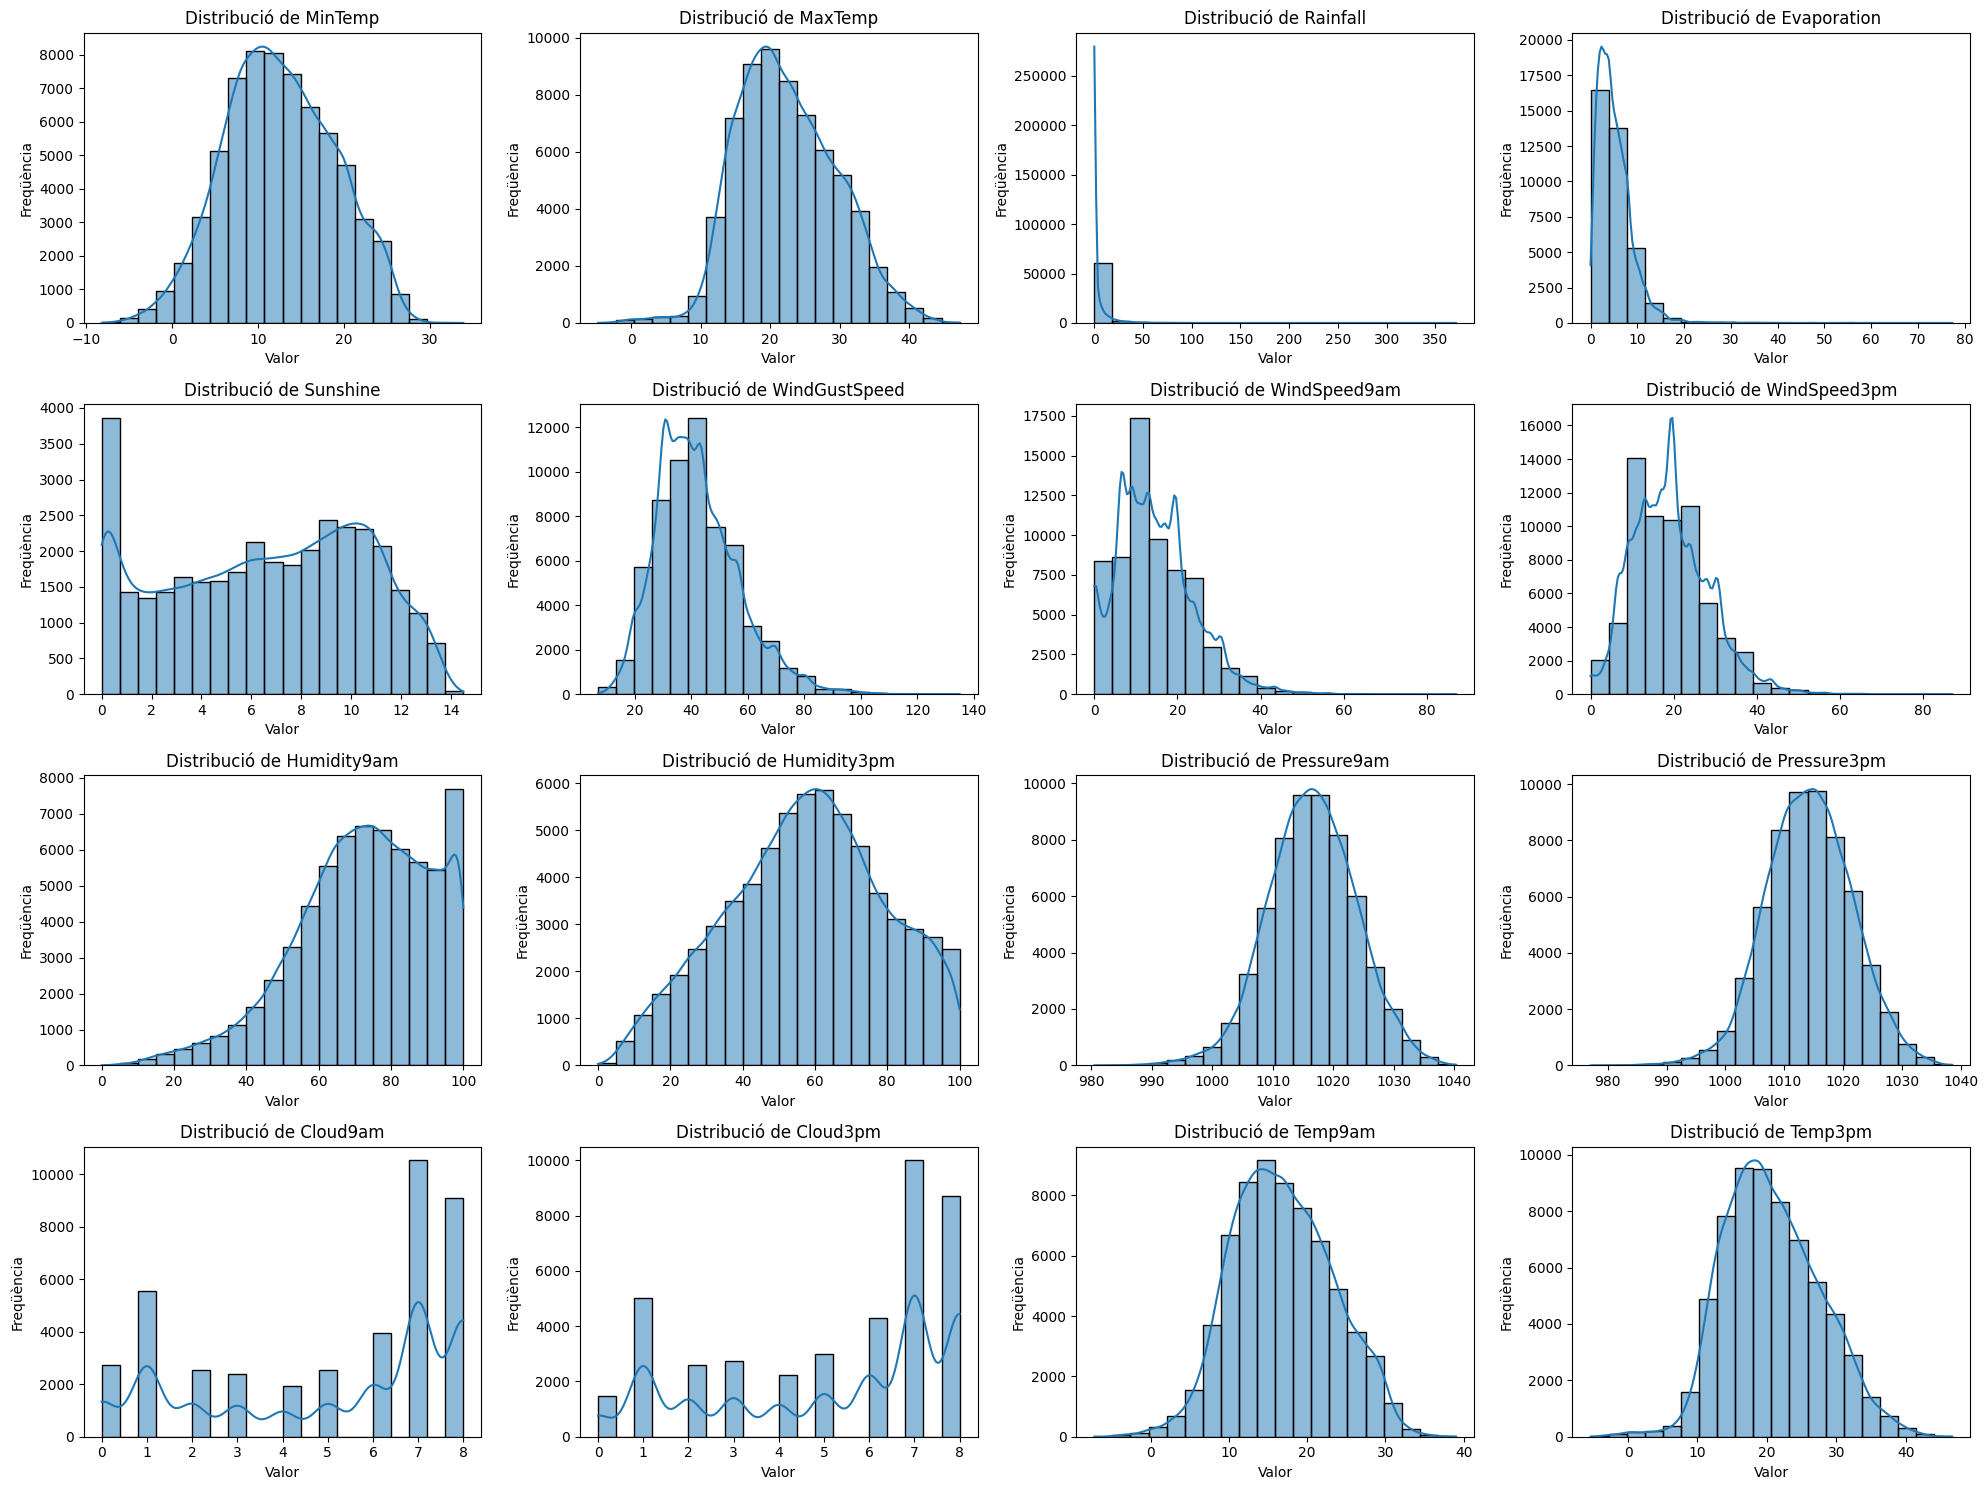

         Variable      Mitjana  Desviació Estàndard
0         MinTemp    12.552091             6.371143
1         MaxTemp    22.480866             7.108686
2        Rainfall     3.669512            10.981571
3     Evaporation     5.122383             3.950017
4        Sunshine     6.514499             3.932475
5   WindGustSpeed    42.142150            14.638665
6    WindSpeed9am    14.634764             9.227585
7    WindSpeed3pm    19.187194             9.171806
8     Humidity9am    72.074781            18.481003
9     Humidity3pm    57.521433            21.741282
10    Pressure9am  1016.524147             7.343975
11    Pressure3pm  1014.237604             7.283068
12       Cloud9am     5.053870             2.778949
13       Cloud3pm     5.184148             2.620094
14        Temp9am    16.888700             6.427827
15        Temp3pm    20.822340             6.931696


In [163]:
estadistiques = pd.DataFrame(columns=['Variable', 'Mitjana', 'Desviació Estàndard'])

fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(var_num):
    mitjana = np.mean(data[column])
    desviacio_estandard = np.std(data[column], ddof=1)

    new_row = pd.DataFrame({
        'Variable': [column],
        'Mitjana': [mitjana],
        'Desviació Estàndard': [desviacio_estandard]
    })

    estadistiques = pd.concat([estadistiques, new_row], ignore_index=True)

    sns.histplot(data[column], bins=20, kde=True, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribució de {column}')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Freqüència')

plt.tight_layout()
plt.show()

print(estadistiques)

#### Variables Categòriques

In [164]:
var_cat = [feature for feature in data.columns if data[feature].dtypes == 'O' or data[feature].dtypes == 'category']
print('Number of categorical variables: ', len(var_cat))
print('*'*80)
print('Categorical variables column name:',var_cat)

Number of categorical variables:  7
********************************************************************************
Categorical variables column name: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


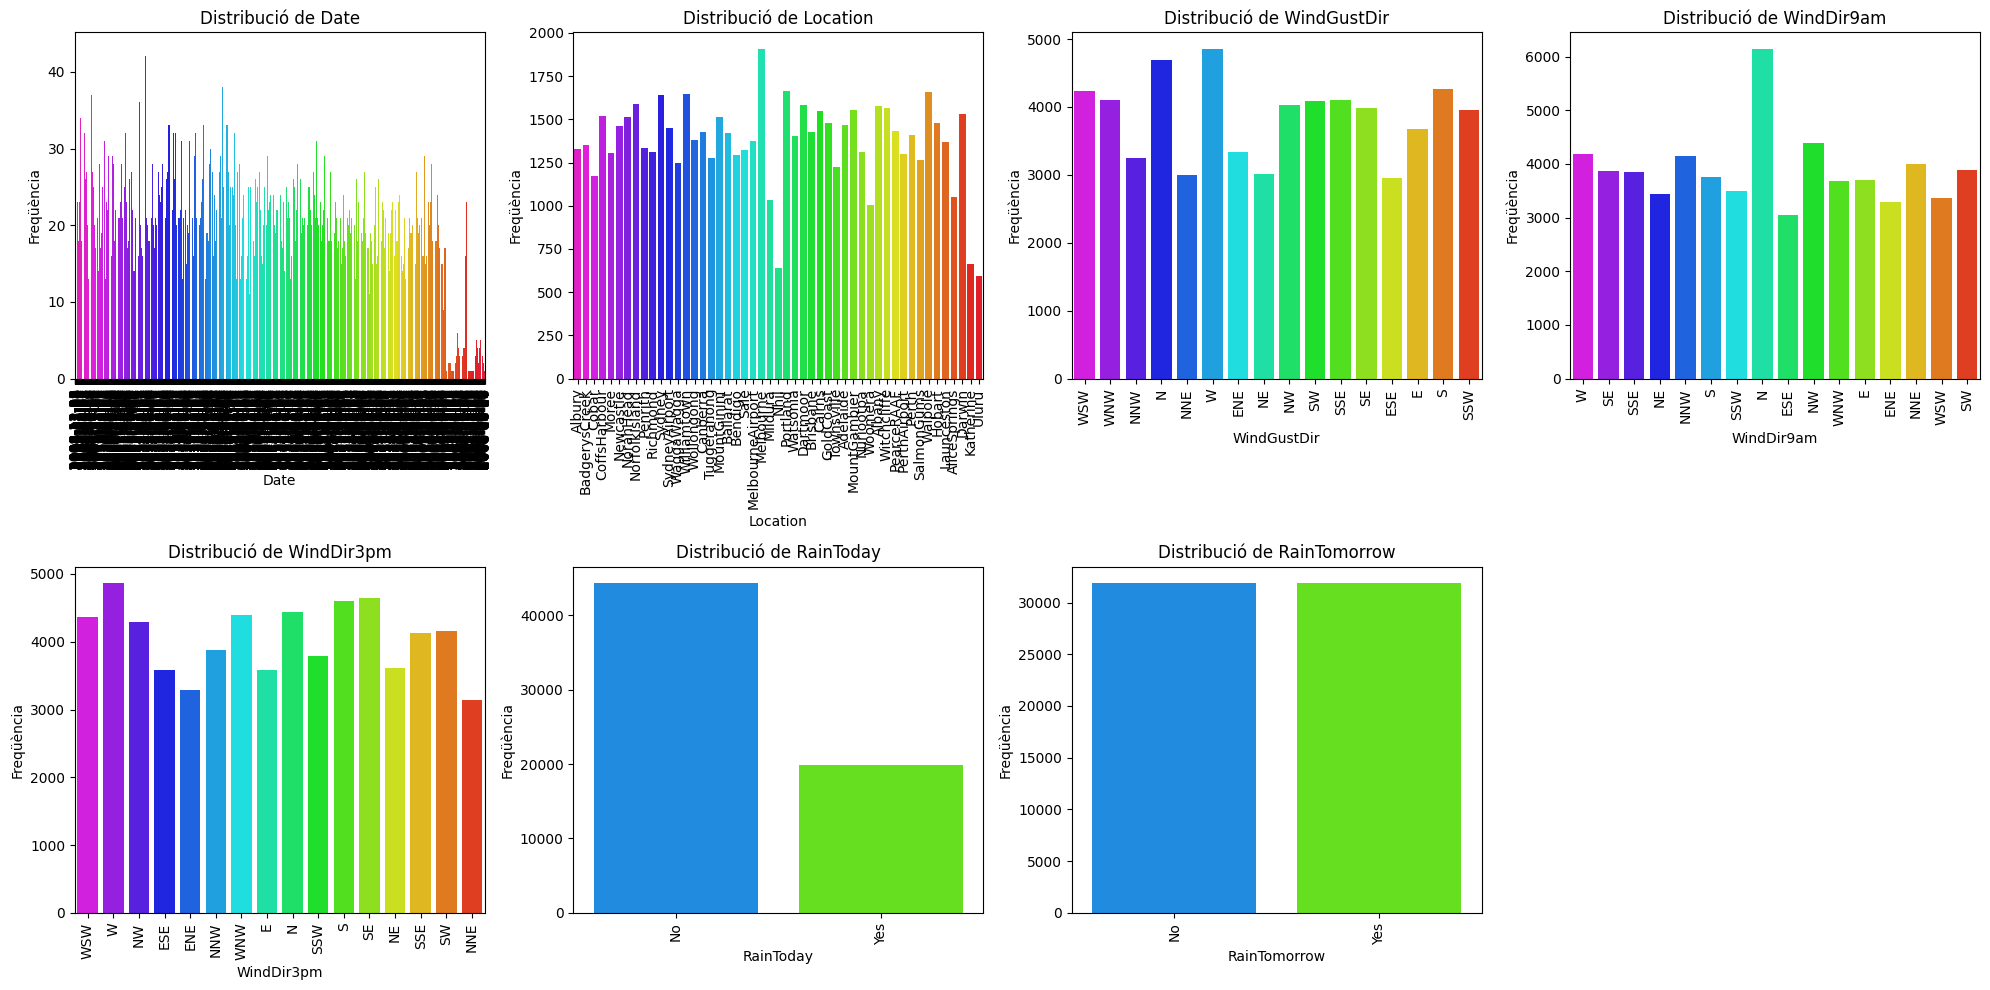

In [165]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  
axes = axes.flatten() 

for i, column in enumerate(var_cat):
    sns.countplot(x=column, hue=column, data=data, palette="gist_rainbow_r", ax=axes[i], legend=False)
    axes[i].set_title(f'Distribució de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Freqüència')

    for label in axes[i].get_xticklabels():
        label.set_rotation(90)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [166]:
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                                         columns=['col_name', 'unique']).sort_values(by=['unique'])
unique_counts

,col_name,unique
22,RainTomorrow,2
21,RainToday,2
18,Cloud3pm,9
17,Cloud9am,9
10,WindDir3pm,16
9,WindDir9am,16
7,WindGustDir,16
12,WindSpeed3pm,42
11,WindSpeed9am,42
1,Location,49


### ANÀLISI BIVARIANT

#### Categòriques amb la variable objectiu

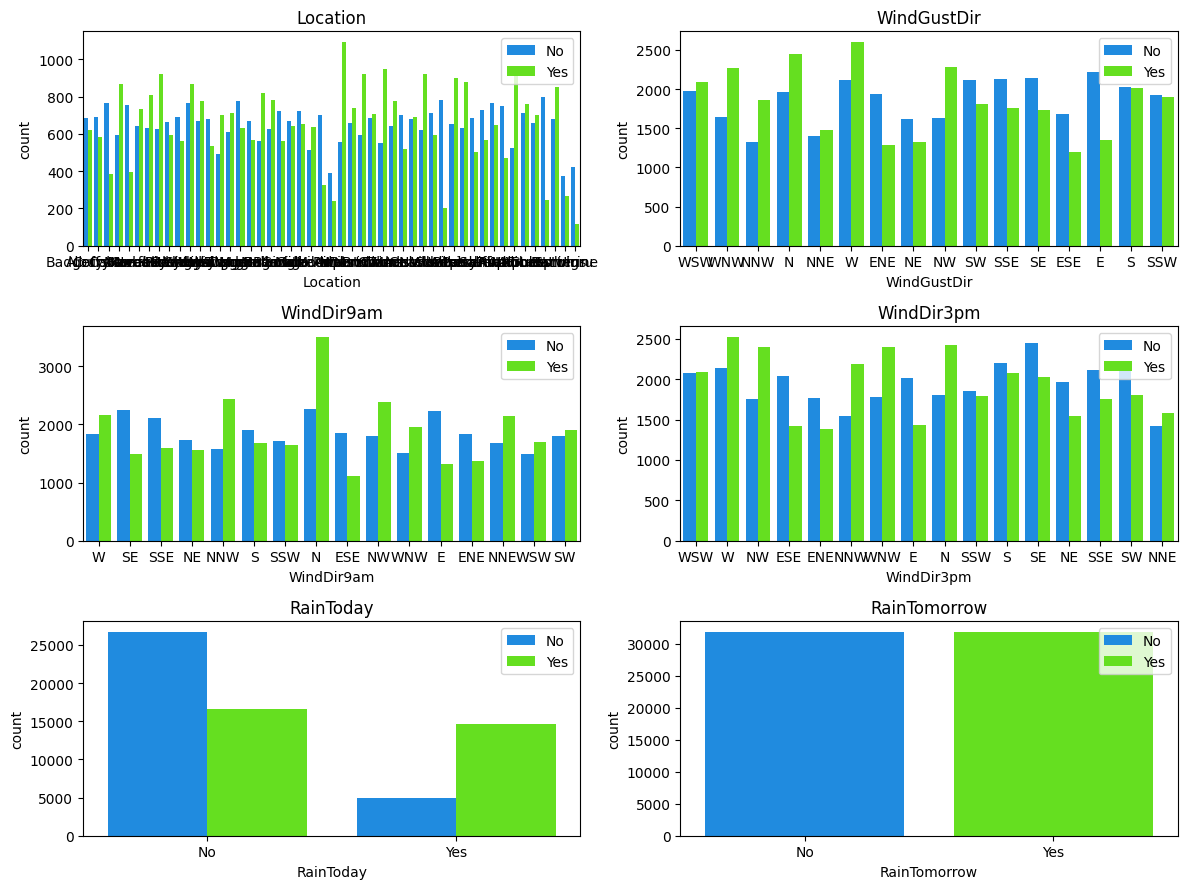

In [167]:
n_cols = 2 
n_rows = (len(var_cat[1:]) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows), dpi=100)  
axes = axes.flatten()  

for idx, variable in enumerate(var_cat[1:]):
    sns.countplot(data=data, x=variable, hue='RainTomorrow', palette='gist_rainbow_r', ax=axes[idx])
    axes[idx].legend(loc='upper right')
    axes[idx].set_title(variable)

for ax in axes[len(var_cat[1:]):]:
    ax.set_visible(False) 

plt.tight_layout()
plt.show()

Aquí podem observar que hi ha algunes variables categòriques que tenen una gran quantitat de categories. Ens encarregarem d'això al preprocessament

#### Numèriques amb la variable objectiu

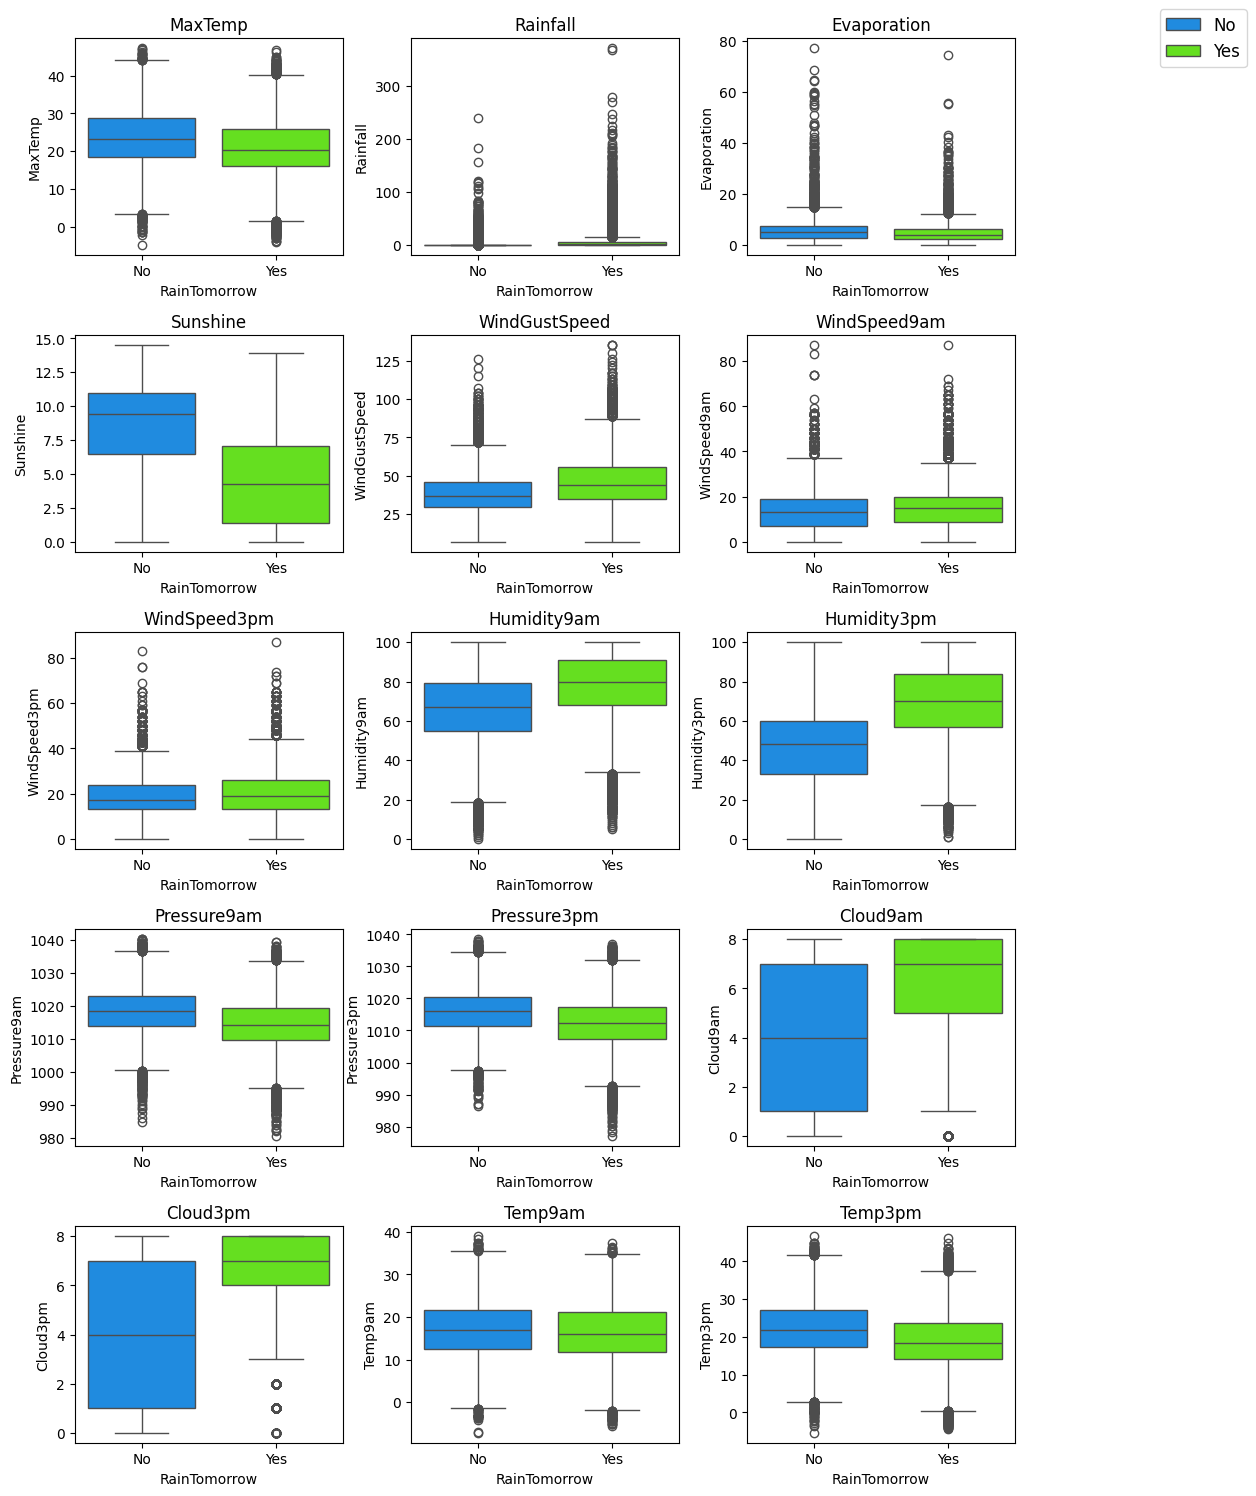

In [168]:
n_cols = 3
n_rows = (len(var_num[1:]) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3), dpi=100)
axes = axes.flatten() 

for idx, variable in enumerate(var_num[1:]):
    sns.boxplot(data=data, x='RainTomorrow', hue='RainTomorrow', y=variable, palette='gist_rainbow_r', ax=axes[idx])
    axes[idx].set_title(f'{variable}')
    axes[idx].set_xlabel('RainTomorrow')
    axes[idx].set_ylabel(variable)
    axes[idx].legend().remove()

for ax in axes[len(var_num[1:]):]:
    ax.set_visible(False)  

handles, labels = axes[0].get_legend_handles_labels()  
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1), fontsize='large')

plt.tight_layout()
plt.subplots_adjust(right=0.85) 
plt.show()

#### Dues variables numèriques

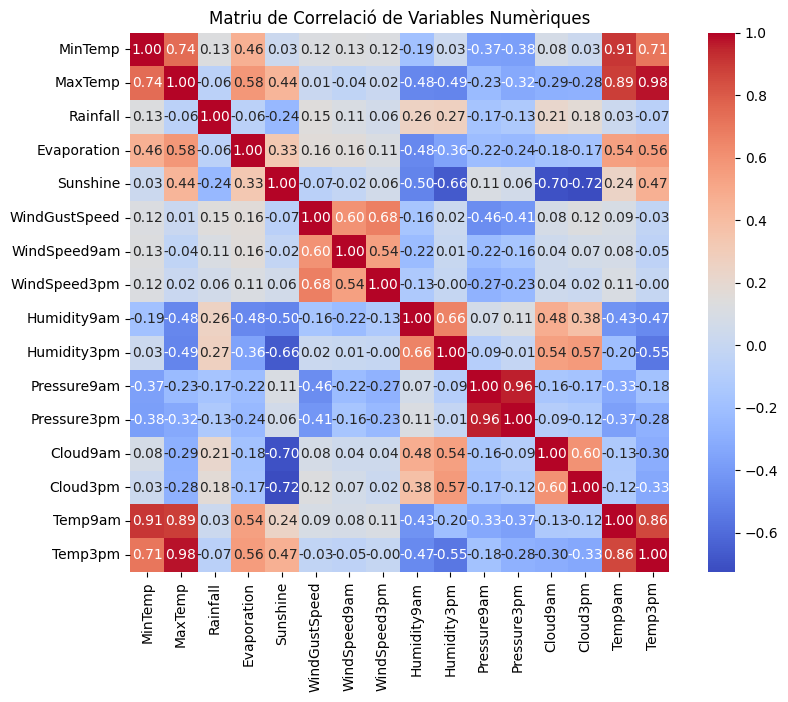

In [169]:
corr_matrix = data[var_num].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriu de Correlació de Variables Numèriques')
plt.show()

De les variables que veiem que tenen una alta correlació, fem un scatter plot. 

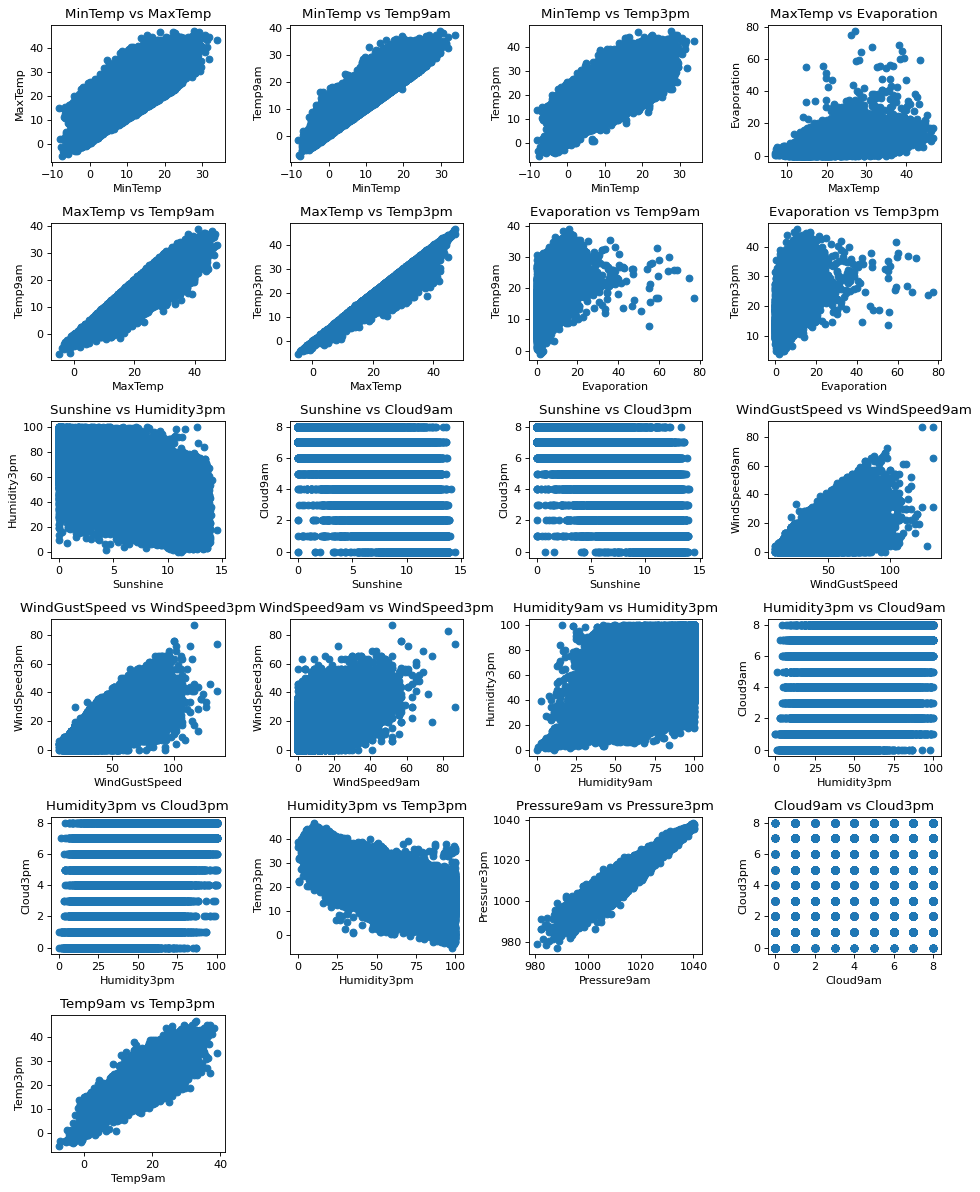

In [170]:
corr_matrix = data[var_num].corr().abs()

umbral_correlacion = 0.5
parejas_alta_corr = np.where((np.triu(corr_matrix.values, k=1) < -umbral_correlacion) | (np.triu(corr_matrix.values, k=1) > umbral_correlacion))

indices_fila = parejas_alta_corr[0]
indices_columna = parejas_alta_corr[1]

num_graficos = len(indices_fila)
n_cols = 4  
n_rows = (num_graficos + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 2.5 * n_rows), dpi=80) 
axes = axes.flatten() 

for idx, (fila, columna) in enumerate(zip(indices_fila, indices_columna)):
    variable_x = corr_matrix.columns[fila]
    variable_y = corr_matrix.index[columna]

    axes[idx].scatter(data[variable_x], data[variable_y])
    axes[idx].set_title(f'{variable_x} vs {variable_y}')
    axes[idx].set_xlabel(variable_x)
    axes[idx].set_ylabel(variable_y)

for ax in axes[num_graficos:]:
    ax.set_visible(False)  

plt.tight_layout()
plt.show()

### Anàlisi de redundància

In [171]:
import pandas as pd
from scipy.stats import chi2_contingency

categoriques = data.select_dtypes(include=['category', 'object']).columns.tolist()

for var in categoriques:
    contingency_table = pd.crosstab(data[var], data['RainTomorrow'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    if p < 0.05:
        relevance = "Rellevant"
    else:
        relevance = "No rellevant"

    print(f"Chi-square test for {var}: chi2 = {chi2}, p-value = {p}, Relevance: {relevance}")


Chi-square test for Date: chi2 = 11119.607714894802, p-value = 0.0, Relevance: Rellevant
Chi-square test for Location: chi2 = 2415.678336293762, p-value = 0.0, Relevance: Rellevant
Chi-square test for WindGustDir: chi2 = 971.9961979403071, p-value = 1.3506248993834652e-197, Relevance: Rellevant
Chi-square test for WindDir9am: chi2 = 1413.5083205121614, p-value = 2.0544079644459983e-292, Relevance: Rellevant
Chi-square test for WindDir3pm: chi2 = 851.6414955468024, p-value = 7.814567692064555e-172, Relevance: Rellevant
Chi-square test for RainToday: chi2 = 7169.769628578961, p-value = 0.0, Relevance: Rellevant
Chi-square test for RainTomorrow: chi2 = 63750.000062741165, p-value = 0.0, Relevance: Rellevant


Veiem que totes les variables categòriques són rellevants per a la predicció de la nostra variable objectiu

## 2. ESTRATÈGIA DE PREPROCESSAMENT

### Recodificació de variables categòriques

Date: 

In [172]:
# Partirem les dates en tres variables diferents (day, month, year)

data['Date']= pd.to_datetime(data["Date"])

data['year'] = data.Date.dt.year
data['month'] = data.Date.dt.month
data['day'] = data.Date.dt.day

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
1,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,1005.4,NaN,NaN,20.6,28.9,No,No,2008,12,6
2,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,1003.6,NaN,NaN,18.3,30.2,No,Yes,2008,12,9
3,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,1008.7,NaN,NaN,20.4,28.8,No,Yes,2008,12,11
4,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,2008,12,12


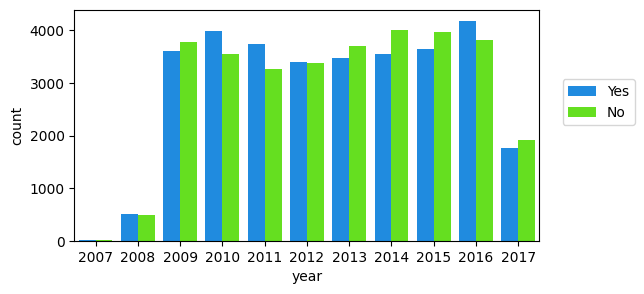

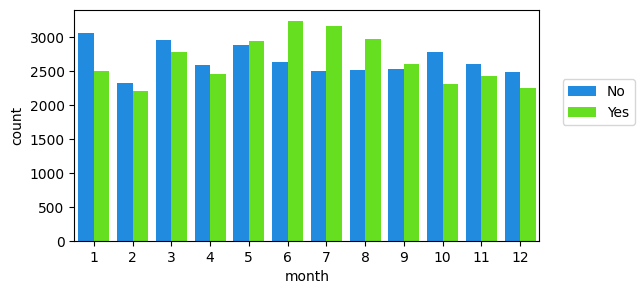

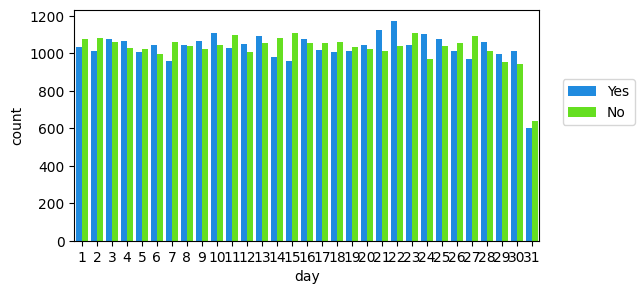

In [173]:
variables_temporals = ['year', 'month', 'day']
for variable in variables_temporals:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.countplot(data=data, x=variable, hue='RainTomorrow', palette='gist_rainbow_r')
    plt.legend(loc=(1.05, 0.5))
    plt.show()

In [174]:
data = data.drop(columns=['Date'])

Location

In [175]:
# Para reducir el numero de categorias dividiremos las ciudades por estados en Australia

ciudades_por_estado = {
    'New South Wales': ['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle',
                        'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport',
                        'WaggaWagga', 'Williamtown', 'Wollongong'],
    'Australian Capital Territory': ['Canberra', 'Tuggeranong', 'MountGinini'],
    'Victoria': ['Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne',
                 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor'],
    'Queensland': ['Brisbane', 'Cairns', 'GoldCoast', 'Townsville'],
    'South Australia': ['Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera'],
    'Western Australia': ['Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole'],
    'Tasmania': ['Hobart', 'Launceston'],
    'Northern Territory': ['AliceSprings', 'Darwin', 'Katherine', 'Uluru']
}


In [176]:
ciudad_a_estado = {}
for estado, ciudades in ciudades_por_estado.items():
    for ciudad in ciudades:
        ciudad_a_estado[ciudad] = estado


In [177]:
data['State'] = data['Location'].map(ciudad_a_estado)
print(data[['Location', 'State']])
print(data['State'].value_counts())


      Location               State
0       Albury     New South Wales
1       Albury     New South Wales
2       Albury     New South Wales
3       Albury     New South Wales
4       Albury     New South Wales
...        ...                 ...
67016    Uluru  Northern Territory
67017    Uluru  Northern Territory
67018    Uluru  Northern Territory
67019    Uluru  Northern Territory
67020    Uluru  Northern Territory

[67021 rows x 2 columns]
New South Wales                 21248
Victoria                        13643
Western Australia               10213
Queensland                       5684
South Australia                  5335
Australian Capital Territory     4218
Northern Territory               3833
Tasmania                         2847
Name: State, dtype: int64


In [178]:
data.drop('Location', axis=1, inplace=True)
print(data.head())


   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0     12.9     25.7       0.0          NaN       NaN         WSW   
1     14.6     29.7       0.2          NaN       NaN         WNW   
2      9.7     31.9       0.0          NaN       NaN         NNW   
3     13.4     30.4       0.0          NaN       NaN           N   
4     15.9     21.7       2.2          NaN       NaN         NNE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Cloud9am  Cloud3pm  \
0           46.0          W        WSW          19.0  ...       NaN       2.0   
1           56.0          W          W          19.0  ...       NaN       NaN   
2           80.0         SE         NW           7.0  ...       NaN       NaN   
3           30.0        SSE        ESE          17.0  ...       NaN       NaN   
4           31.0         NE        ENE          15.0  ...       8.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  \
0     21.0     23.2         No        

Wind direction: 'WindGustDir', 'WindDir9am', 'WindDir3pm'

In [179]:
def simplificar_direccio(dir):
    if dir in ['N', 'NNE', 'NE', 'ENE']:
        return 'N'
    elif dir in ['S', 'SSW', 'SW', 'WSW']:
        return 'S'
    elif dir in ['E', 'ESE', 'SE', 'SSE']:
        return 'E'
    elif dir in ['W', 'WNW', 'NW', 'NNW']:
        return 'O'
    else:
        return np.nan  


In [180]:
data['WindGustDir'] = data['WindGustDir'].apply(simplificar_direccio)
data['WindDir9am'] = data['WindDir9am'].apply(simplificar_direccio)
data['WindDir3pm'] = data['WindDir3pm'].apply(simplificar_direccio)


In [181]:
print(data['WindGustDir'].unique())
print(data['WindDir9am'].unique())
print(data['WindDir3pm'].unique())


['S' 'O' 'N' nan 'E']
['O' 'E' 'N' 'S' nan]
['S' 'O' 'E' 'N' nan]


Jo després de canviar aquestes variables repetiria el bivariate amb la variable objectiu

Un cop fets tots els canvis, les nostres variables categòriques les recodificarem utilitzant el one-hot encoding per poder-les utilitzar als models

In [182]:
def recodificacio_one_hot(X_train, X_test, categoriques, numeriques):
    encoder = OneHotEncoder(sparse_output=False)
    train_encoded = encoder.fit_transform(X_train[categoriques])
    test_encoded = encoder.transform(X_test[categoriques])
    X_train_combined = np.concatenate((X_train[numeriques], train_encoded), axis=1)
    X_test_combined = np.concatenate((X_test[numeriques], test_encoded), axis=1)
    return X_train_combined, X_test_combined

### Identificació i tractament d'outliers

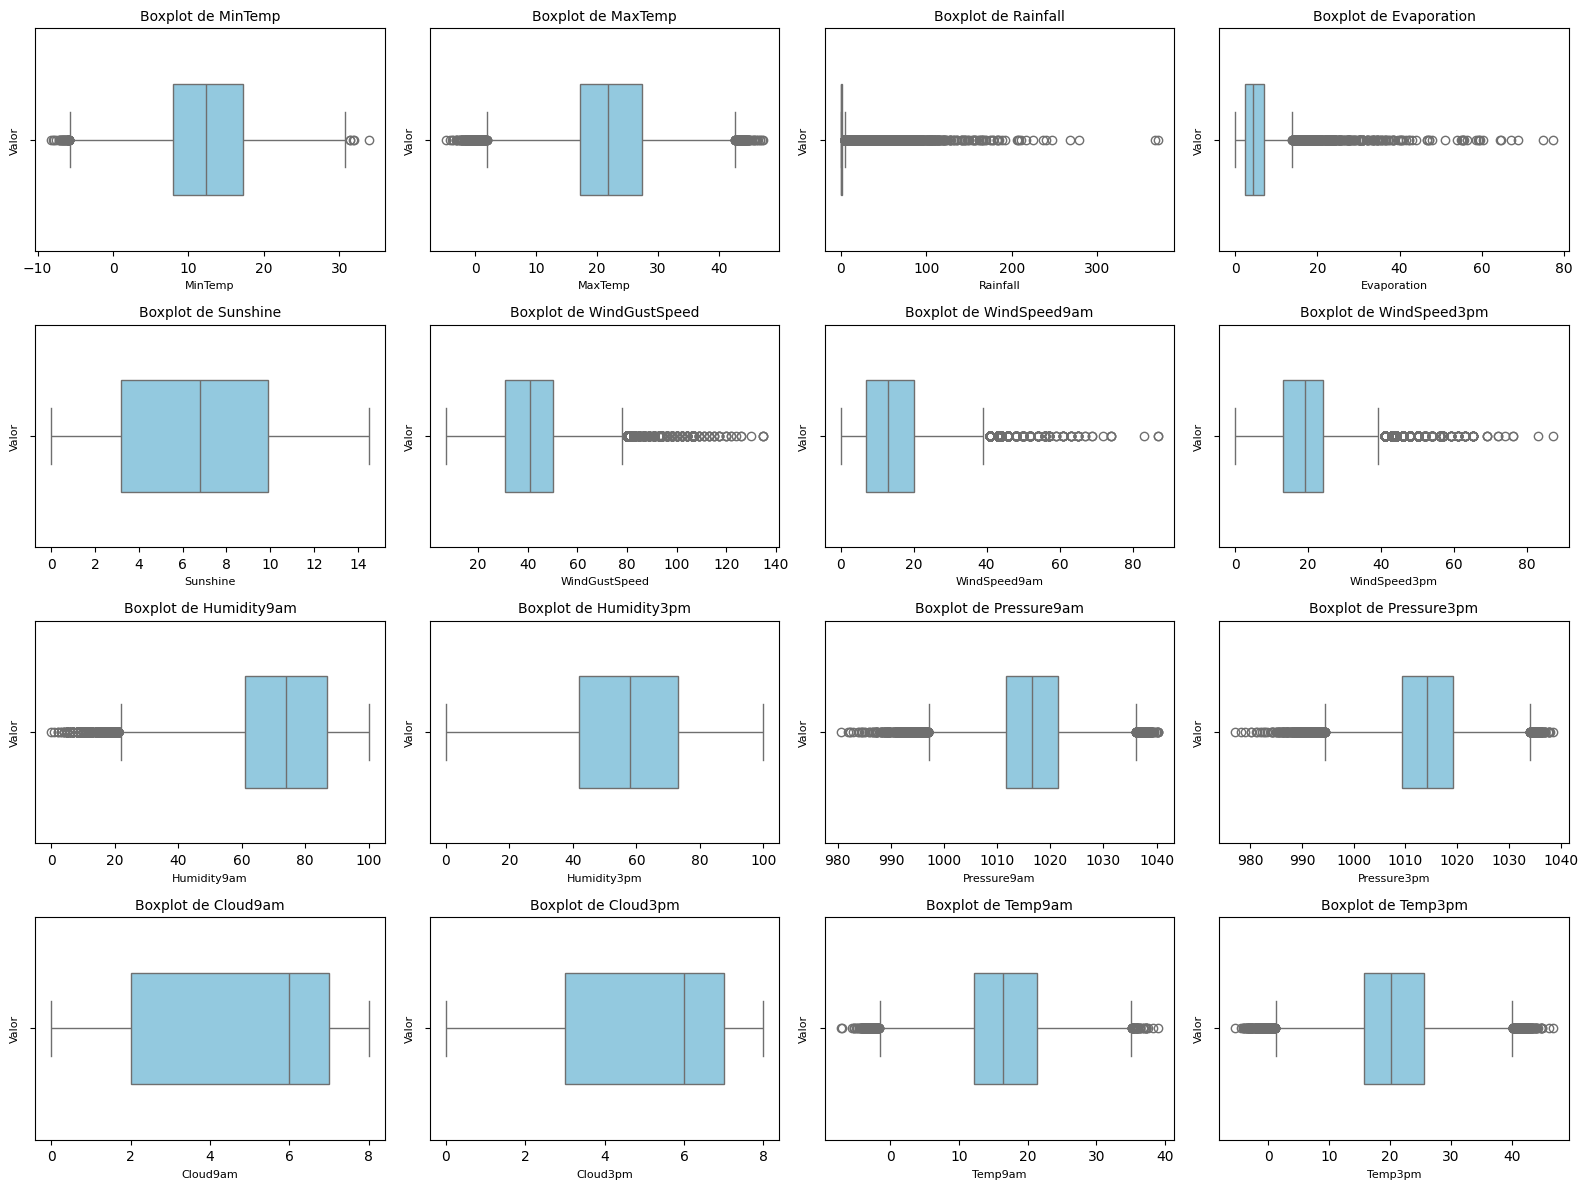

In [183]:
n_cols = 4 
n_rows = (len(var_num) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))  
axes = axes.flatten()  

for idx, columna in enumerate(var_num):
    sns.boxplot(x=data[columna], color='skyblue', width=0.5, ax=axes[idx])
    axes[idx].set_title(f'Boxplot de {columna}', fontsize=10)
    axes[idx].set_xlabel(columna, fontsize=8)
    axes[idx].set_ylabel('Valor', fontsize=8)

for ax in axes[len(var_num):]:
    ax.set_visible(False)  

plt.tight_layout()
plt.show()

In [ ]:
outliers_summary = pd.DataFrame(columns=['Variable', 'Lower Outlier Threshold', 'Upper Outlier Threshold', 'Min Value', 'Max Value', 'Number of Outliers'])

for column in var_num:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    
    # Información a almacenar
    min_value = data[column].min()
    max_value = data[column].max()
    num_outliers = outliers.count()
    outliers_summary = outliers_summary.append({
        'Variable': column,
        'Lower Outlier Threshold': lower_bound,
        'Upper Outlier Threshold': upper_bound,
        'Min Value': min_value,
        'Max Value': max_value,
        'Number of Outliers': num_outliers
    }, ignore_index=True)

# Quitar los índices de la tabla y mostrar con separadores
outliers_summary_str = outliers_summary.to_string(index=False)
separator = '-' * len(outliers_summary_str.split('\n')[0])
print(separator)
print(outliers_summary_str.replace('\n', '\n' + separator + '\n'))

In [ ]:
outliers_rainfall = data[data['Rainfall'] > 250].index
count_rainfall = len(outliers_rainfall)

outliers_evaporation = data[(data['Evaporation'] < 0) | (data['Evaporation'] > 20)].index
count_evaporation = len(outliers_evaporation)

outliers_windgust = data[(data['WindGustSpeed'] < 0) | (data['WindGustSpeed'] > 100)].index
count_windgust = len(outliers_windgust)

data = data.drop(outliers_rainfall.union(outliers_evaporation).union(outliers_windgust))

total_outliers_removed = count_rainfall + count_evaporation + count_windgust
print(total_outliers_removed)

Veiem que tot i que hi ha valors extrems que poden considerar-se outliers, en tots els casos són mesures correctes que hem considerat necessàries pel model. Per tant, no eliminem cap outlier. 

### Identifiació i tractament de missing values

In [26]:
def data_explore(dataframe):
    print("DATA EXPLORATION")
    print('*'*70)
    print("Shape of dataset : ",dataframe.shape)
    print('*'*70)
    print(dataframe.info())
    print('*'*70)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print('*'*70)
    print(dataframe.describe().T)
    print('*'*70)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print('*'*70)
    print(dataframe.describe(exclude = ['float', 'int64']).T)
    print('*'*70)
    print("MISSING VALUES")
    print('*'*70)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*70)
    print("MISSING VALUES IN %")
    print('*'*70)
    print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
    print('*'*70)

In [27]:
data_explore(data)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (67021, 25)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67021 entries, 0 to 67020
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        65864 non-null  float64
 1   MaxTemp        65940 non-null  float64
 2   Rainfall       64271 non-null  float64
 3   Evaporation    37591 non-null  float64
 4   Sunshine       34831 non-null  float64
 5   WindGustDir    61534 non-null  object 
 6   WindGustSpeed  61576 non-null  float64
 7   WindDir9am     62270 non-null  object 
 8   WindDir3pm     64733 non-null  object 
 9   WindSpeed9am   65971 non-null  float64
 10  WindSpeed3pm   65328 non-null  float64
 11  Humidity9am    65257 non-null  float64
 12  Humidity3pm    64388 non-null  float64
 13  Pressure9am    59750 non-null  floa

Borrem les files que tenen missing data a RainTomorrow perquè llavors no podrem predir-la si no sabem el seu valor real. 

In [122]:
data = data.dropna(subset=['RainTomorrow'])

Borrem les files que tenen missing data d'aquelles variables que tinguin un alt percentatge de missing data

In [123]:
data = data.dropna(subset=['Sunshine'])

In [30]:
data_explore(data)
data.shape

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (31756, 25)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 31756 entries, 2683 to 65764
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        31718 non-null  float64
 1   MaxTemp        31739 non-null  float64
 2   Rainfall       31611 non-null  float64
 3   Evaporation    31756 non-null  float64
 4   Sunshine       31756 non-null  float64
 5   WindGustDir    29616 non-null  object 
 6   WindGustSpeed  29630 non-null  float64
 7   WindDir9am     30709 non-null  object 
 8   WindDir3pm     31426 non-null  object 
 9   WindSpeed9am   31672 non-null  float64
 10  WindSpeed3pm   31565 non-null  float64
 11  Humidity9am    31564 non-null  float64
 12  Humidity3pm    31471 non-null  float64
 13  Pressure9am    31703 non-null  float6

(31756, 25)

Es probaran diferents tècniques d'imputació per veure quina és més eficaç: KNN i MICE

In [124]:
def imputacio_missings(X_train, X_test, metode=None):
    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()

    if metode == 'knn':
        imputer = KNNImputer(n_neighbors=5)
        X_train_imputat = imputer.fit_transform(X_train_copy)
        X_test_imputat = imputer.transform(X_test_copy)
        
    elif metode == 'mice':
        imputer = IterativeImputer(max_iter=10, random_state=0)
        X_train_imputat = imputer.fit_transform(X_train_copy)
        X_test_imputat = imputer.transform(X_test_copy)
    
    else:
        X_train_imputat = X_train_copy
        X_test_imputat = X_test_copy
    
    return X_train_imputat, X_test_imputat



### Balanceig de les dades

A l'anàlisi univariant i bivariant ja hem vist que la nostra variable a predir està molt balancejada

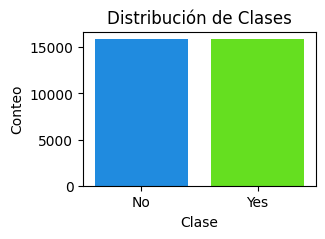

In [125]:
data['RainTomorrow'].value_counts()

plt.figure(figsize=(3, 2))
sns.countplot(x='RainTomorrow', hue='RainTomorrow', data=data, palette="gist_rainbow_r")
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.show()


Per tant, no cal utilitzar cap tècnica de oversampling o undersampling. 

### Normalització de les dades

S'ha probat de normalitzar les dades amb dos mètodes diferents: MinMax i StandardScaler

In [126]:
def normalitzacio_dades(X_train, X_test, metode=None):
    if metode == 'standard':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled
    
    elif metode == 'minmax':
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled
    
    else:
        return X_train, X_test

## 3. REMOSTREIG

Com a model lineal es fa una regressió logística ja que la nostra variable objectiu és binària.

In [127]:
def particio_dades(data):
    X = data.copy()
    X = X.drop('RainTomorrow', axis=1)
    y = data['RainTomorrow']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return  X_train, X_test, y_train, y_test

Visualitzarem els resultats mitjançant una matriu de confusió, una corba roc i altres mètriques

In [128]:
# Matriu de confusió

def visualitzar_matriu_confusio(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Matriu de Confusió')
    plt.xlabel('Prediccions')
    plt.ylabel('Valores Reals')
    plt.show()

In [129]:
# Corba ROC

def visualitzar_corba_roc(y_test, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [130]:
# Altres mètriques

def calcul_metriques(y_pred, y_true):
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    accuracy = accuracy_score(y_true, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("Accuracy:", accuracy)
    return precision, recall, f1, accuracy


In [131]:
import pandas as pd

# Crear un dataframe inicialmente vacío para almacenar los resultados
results_df = pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])

def add_results(model_name, accuracy, f1_score, recall, precision, dataframe):
    """
    Añade los resultados del entrenamiento de un modelo a un dataframe existente.

    Args:
    model_name (str): Nombre del modelo para identificar los registros.
    accuracy (float): Valor de la precisión del modelo.
    f1_score (float): Valor del F1 score del modelo.
    recall (float): Valor del recall del modelo.
    precision (float): Valor de la precisión del modelo.
    dataframe (DataFrame): DataFrame de Pandas donde se almacenarán los resultados.

    Returns:
    DataFrame: DataFrame actualizado con los nuevos resultados.
    """
    new_row = pd.DataFrame({
        'Model Name': [model_name],
        'Accuracy': [accuracy],
        'F1 Score': [f1_score],
        'Recall': [recall],
        'Precision': [precision]
    })
    # Usando concat en lugar de append
    updated_dataframe = pd.concat([dataframe, new_row], ignore_index=True)
    return updated_dataframe

"""# Ejemplo de cómo utilizar la función para añadir resultados
# Supongamos que tienes las métricas de un modelo:
model_name = "EjemploModelo"
accuracy = 0.95
f1_score = 0.94
recall = 0.93
precision = 0.92

# Añadir resultados al dataframe
results_df = add_results(model_name, accuracy, f1_score, recall, precision, results_df)

# Mostrar el dataframe actualizado
print(results_df)"""


'# Ejemplo de cómo utilizar la función para añadir resultados\n# Supongamos que tienes las métricas de un modelo:\nmodel_name = "EjemploModelo"\naccuracy = 0.95\nf1_score = 0.94\nrecall = 0.93\nprecision = 0.92\n\n# Añadir resultados al dataframe\nresults_df = add_results(model_name, accuracy, f1_score, recall, precision, results_df)\n\n# Mostrar el dataframe actualizado\nprint(results_df)'

Ara escollim el preprocessament que volem aplicar

In [132]:
def preprocessament(data, escalat = 'minmax', imputacio = 'knn'):
    X_train, X_test, y_train, y_test = particio_dades(data)

    encoder = LabelEncoder()
    y_train_encoded = encoder.fit_transform(y_train)
    y_test_encoded = encoder.transform(y_test)
    
    numeriques = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categoriques = X_train.select_dtypes(include=['category', 'object']).columns.tolist()

    # Recodifiquem les categòriques
    X_train_encoded, X_test_encoded = recodificacio_one_hot(X_train, X_test, categoriques, numeriques)

    # Normalitzem les dades
    X_train_encoded, X_test_encoded = normalitzacio_dades(X_train_encoded, X_test_encoded, escalat)

    # Imputem missings
    X_train_imputed, X_test_imputed = imputacio_missings(X_train_encoded, X_test_encoded, imputacio)

    return X_train_imputed, X_test_imputed, y_train_encoded, y_test_encoded

In [133]:
def entrenament_linearmodel(data, model, nom, parametres=None, escala = 'minmax', imputacio = 'knn'):
    X_train, X_test, y_train, y_test = preprocessament(data, escala, imputacio)

    # Cross Validation si necessitem trobar els hiperparàmetres
    if parametres:
        grid_search = GridSearchCV(model, parametres, cv=5, scoring='f1')
        grid_search.fit(X_train, y_train)
        print("Millors paràmetres:", grid_search.best_params_)
        print("Millor F1 score en CV:", grid_search.best_score_)
        model = grid_search.best_estimator_

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Mètriques
    precision, recall, f1, accuracy = calcul_metriques(y_pred, y_test)
    visualitzar_matriu_confusio(y_test, y_pred)
    visualitzar_corba_roc(y_test, y_pred)
    resultats_total = add_results(nom, accuracy, f1, recall, precision, results_df)
    print(resultats_total)


## 4. MODEL LINEAL BASE

### Logistic Regression

Millors paràmetres: {'C': 1, 'penalty': 'l1'}
Millor F1 score en CV: 0.7958977845980757
Precision: 0.8073118279569892
Recall: 0.7824093372238433
F1-Score: 0.7946655376799323
Accuracy: 0.7963682166474231


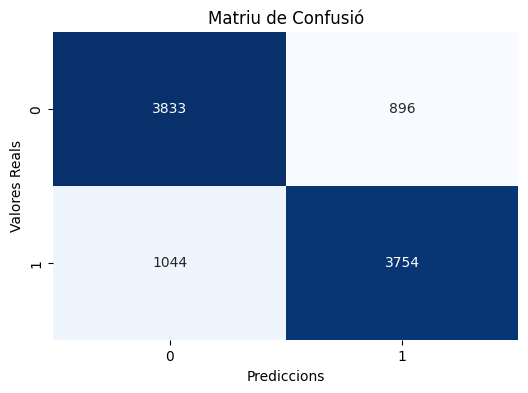

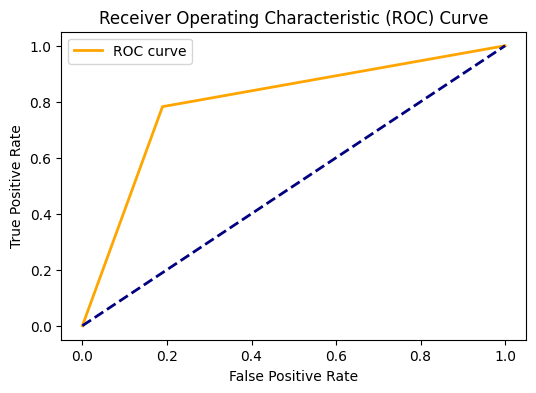

            Model Name  Accuracy  F1 Score    Recall  Precision
0  LinearRegressionReg  0.796368  0.794666  0.782409   0.807312


"model = LogisticRegression(solver='lbfgs', max_iter=1000)\nparam_grid = {\n    'C': [0.01, 0.1, 1, 1000],\n    'penalty': ['none', 'l1', 'l2']\n}\n\nentrenament_linearmodel(data, model, 'LinearRegression', parametres=param_grid, escala = 'minmax', imputacio = 'knn')"

In [135]:
model = LogisticRegression(solver='liblinear')

param_grid = {
    'C': [0.01, 0.1, 1],  # Valors per la regularització: afegir valors 10 i 100
    'penalty': ['l1', 'l2']  # Tipus de penalització
}

entrenament_linearmodel(data, model, 'LinearRegressionReg',parametres=param_grid, escala = 'minmax', imputacio = 'knn')

"""model = LogisticRegression(solver='lbfgs', max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 1000],
    'penalty': ['none', 'l1', 'l2']
}

entrenament_linearmodel(data, model, 'LinearRegression', parametres=param_grid, escala = 'minmax', imputacio = 'knn')"""


Precision: 0.8045112781954887
Recall: 0.7805335556481867
F1-Score: 0.7923410557494975
Accuracy: 0.7939540254014905


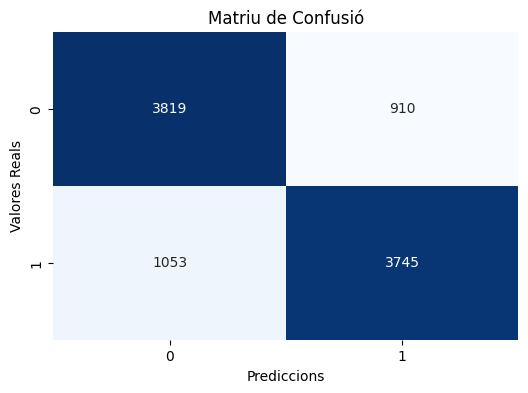

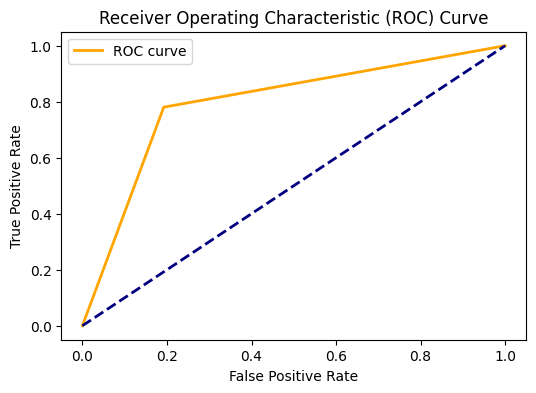

         Model Name  Accuracy  F1 Score    Recall  Precision
0  LinearRegression  0.793954  0.792341  0.780534   0.804511


In [134]:
model = LogisticRegression()
entrenament_linearmodel(data, model,'LinearRegression', parametres=None, escala = 'minmax', imputacio = 'knn')

### Random Forest

Millors paràmetres: {'max_depth': 30, 'n_estimators': 200}
Millor F1 score en CV: 0.8078184154106243
Precision: 0.8047520661157025
Recall: 0.8117965819091288
F1-Score: 0.8082589748910562
Accuracy: 0.8060249816311535


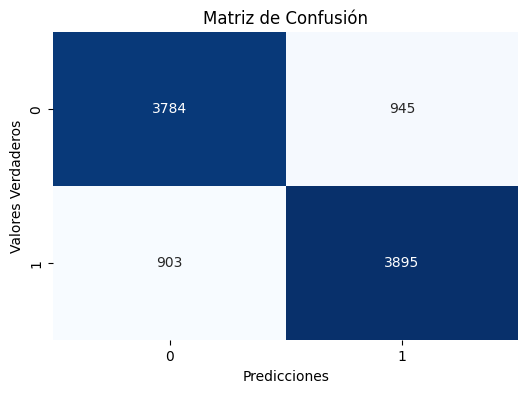

In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
parametres = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50]
}
entrenament_linearmodel(data, model,'RandomForest', parametres=None, escala = 'minmax', imputacio = 'knn')

# PERCEPTRÓ MULTICAPA

Coses que es poden canviar per millorar el model:

- Optimizers: o Adam o SGD
- Learning rate
- Nombre de epochs
- Regularització: l1 o l2
- Nombre de capes
- Nombre de neurones per capa

In [119]:
%pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [90]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist, fashion_mnist

from keras.optimizers.legacy import SGD, Adam
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, fetch_covtype, fetch_california_housing
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [91]:
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(epochs, train_accuracy, 'g-', label='Training Accuracy')
  axes[1].plot(epochs, val_accuracy, 'orange', label='Validation Accuracy')
  axes[1].set_title('Training and Validation Accuracy')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('Accuracy')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()

In [92]:
datos = data.copy()
X_train, X_test, y_train, y_test = preprocessament(datos)

X_train:  (22229, 24)
y_train:  (22229,)
X_train:  (22229, 45)
y_train:  (22229,)


In [ ]:
def enregistrar_resultats(history, results_df, model_name):
    final_epoch_results = history.history
    results_df.loc[len(results_df)] = [
    model_name,
    final_epoch_results['accuracy'][-1],
    final_epoch_results['loss'][-1],
    final_epoch_results['val_accuracy'][-1],
    final_epoch_results['val_loss'][-1]
    ]
    return results_df

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l1_l2, l2

def entrenamiento_perceptron_multicapa(X_train, y_train, layers_info, optimizer_info, nom_model, num_epochs=100, batch_size=16, validation_split=0.1):
    """
    Entrena un modelo de perceptrón multicapa.

    Args:
    X_train (array): Características de entrenamiento.
    y_train (array): Etiquetas de entrenamiento.
    layers_info (list): Lista de diccionarios con la configuración de cada capa (neurons, activation, regularizer).
    optimizer_info (dict): Diccionario con el tipo de optimizador ('adam' o 'sgd') y sus parámetros.
    num_epochs (int): Número de épocas para el entrenamiento.
    batch_size (int): Tamaño del lote para el entrenamiento.
    validation_split (float): Fracción de los datos para validar el modelo.

    Returns:
    model: Modelo entrenado.
    history: Datos del proceso de entrenamiento.
    """

    # Creació model i les seves capes
    model = Sequential()
    for layer in layers_info:
        if 'regularizer' in layer:
            regularizer = l1_l2(l1=layer['regularizer'].get('l1', 0), l2=layer['regularizer'].get('l2', 0))
        else:
            regularizer = None
        model.add(Dense(layer['neurons'], activation=layer['activation'], kernel_regularizer=regularizer))

    # Optimitzador
    if optimizer_info['type'] == 'adam':
        optimizer = Adam(learning_rate=optimizer_info['learning_rate'])
    elif optimizer_info['type'] == 'sgd':
        optimizer = SGD(learning_rate=optimizer_info['learning_rate'], momentum=optimizer_info.get('momentum', 0), nesterov=optimizer_info.get('nesterov', False))

    # Compilació model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    # En comptes de binary es pot fer sparcecategorical cross entropy

    # Entrenament del model
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=validation_split, verbose=2)

    return model, history

In [100]:
def evaluacio_mlp(X_test, y_test, model, history):
    # Obtiene las predicciones del modelo
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1) if model.output_shape[-1] > 1 else (y_pred > 0.5).astype("int32")

    loss, accuracy = model.evaluate(X_test, y_test)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)

    plot_curves(history)
    
    # Calcula el F1 Score y el Recall
    f1 = f1_score(y_test, y_pred_classes, average='macro')  # Puedes cambiar 'macro' por 'micro' o 'weighted' según tus necesidades
    recall = recall_score(y_test, y_pred_classes, average='macro')
    
    print("Test F1 Score:", f1)
    print("Test Recall:", recall)

MODEL 1

In [ ]:
learning_rate = 0.1
optimizer_info = {'type': 'adam', 'learning_rate': learning_rate}
num_epochs = 10
batch_size = 8
layers_info = [{'neurons': 2, 'activation': 'softmax'}]

entrenamiento_perceptron_multicapa(X_train, y_train, layers_info, optimizer_info, 'Model 1', num_epochs=num_epochs, batch_size=batch_size, validation_split=0.1)


In [93]:
def entrenament_perceptro1(X_train, y_train):
    
    model = Sequential([
        Dense(2, activation='softmax')
    ])
    learning_rate = 0.1
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    num_epochs = 10
    batch_size = 8
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=2)

    return model, history

Epoch 1/10
2501/2501 - 3s - loss: 0.5812 - accuracy: 0.7519 - val_loss: 0.5500 - val_accuracy: 0.7670 - 3s/epoch - 1ms/step
Epoch 2/10
2501/2501 - 3s - loss: 0.5938 - accuracy: 0.7530 - val_loss: 0.4971 - val_accuracy: 0.7791 - 3s/epoch - 1ms/step
Epoch 3/10
2501/2501 - 3s - loss: 0.5712 - accuracy: 0.7586 - val_loss: 0.5153 - val_accuracy: 0.7620 - 3s/epoch - 1ms/step
Epoch 4/10
2501/2501 - 3s - loss: 0.5756 - accuracy: 0.7599 - val_loss: 0.5369 - val_accuracy: 0.7652 - 3s/epoch - 1ms/step
Epoch 5/10
2501/2501 - 3s - loss: 0.5646 - accuracy: 0.7609 - val_loss: 0.5518 - val_accuracy: 0.7557 - 3s/epoch - 1ms/step
Epoch 6/10
2501/2501 - 3s - loss: 0.6013 - accuracy: 0.7526 - val_loss: 0.5319 - val_accuracy: 0.7679 - 3s/epoch - 1ms/step
Epoch 7/10
2501/2501 - 3s - loss: 0.5817 - accuracy: 0.7575 - val_loss: 0.5468 - val_accuracy: 0.7701 - 3s/epoch - 1ms/step
Epoch 8/10
2501/2501 - 3s - loss: 0.5879 - accuracy: 0.7602 - val_loss: 0.7333 - val_accuracy: 0.7202 - 3s/epoch - 1ms/step
Epoch 9/

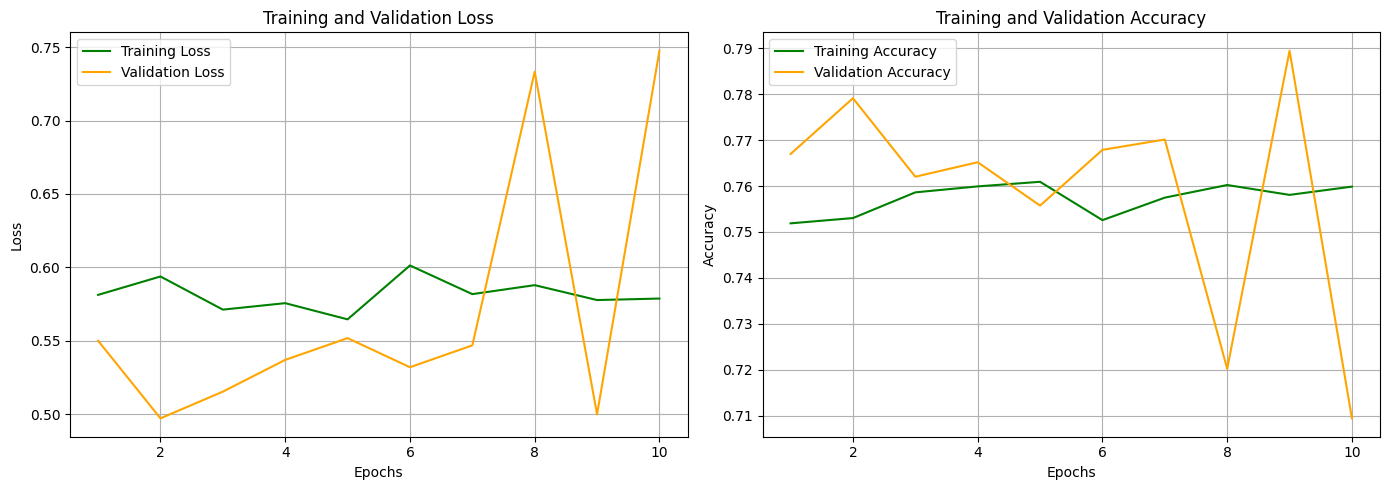

Test F1 Score: 0.7030750797618119
Test Recall: 0.7175118165733221


In [101]:
model, history = entrenament_perceptro1(X_train, y_train)
evaluacio_mlp(X_test, y_test, model, history)

- Diagnosticar situació actual del model(corbes de perdua, mètriques de rendiment, matriu de confusió i model summary)
- Fa underfit, fit o overfit? Entre els possibles diagnòstics estan l’underfit, fit, overfit, inestabilitat del procés d’aprenentatge, manca de convergència, convergència excessivament ràpida/lenta,
comportament aleatori, etc.


• Proposar una millora potencial en funci ́o del diagn`ostic anterior, com per exemple
canvis a l’arquitectura del model o ajustament d’hiperpar`ametres.
• Experimentar amb la millora seleccionada i avaluar-ne l’impacte en el rendiment
del model.

MODEL 2

In [ ]:
layers_info = [
        {'neurons': 64, 'activation': 'relu', 'kernel_initializer': 'he_uniform'},
        {'neurons': 32, 'activation': 'relu', 'kernel_initializer': 'he_uniform'},
        {'neurons': 2, 'activation': 'softmax'}
    ]
optimizer_info = {'type': 'adam', 'learning_rate': 0.001}
num_epochs = 200
batch_size = 16

entrenamiento_perceptron_multicapa(X_train, y_train, layers_info, optimizer_info, num_epochs=num_epochs, batch_size=batch_size, validation_split=0.1)


In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

def entrenament_perceptro2(X_train, y_train):
    model = Sequential([
        Dense(64, activation='relu', kernel_initializer='he_uniform'),
        Dense(32, activation='relu', kernel_initializer='he_uniform'),
        Dense(2, activation='softmax')
    ])
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    num_epochs = 200
    batch_size = 16
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=2)
    return model, history



Epoch 1/200
1251/1251 - 1s - 1ms/step - accuracy: 0.7708 - loss: 0.4751 - val_accuracy: 0.7917 - val_loss: 0.4478
Epoch 2/200
1251/1251 - 1s - 552us/step - accuracy: 0.7995 - loss: 0.4304 - val_accuracy: 0.7818 - val_loss: 0.4536
Epoch 3/200
1251/1251 - 1s - 565us/step - accuracy: 0.8079 - loss: 0.4172 - val_accuracy: 0.7926 - val_loss: 0.4373
Epoch 4/200
1251/1251 - 1s - 545us/step - accuracy: 0.8133 - loss: 0.4043 - val_accuracy: 0.7989 - val_loss: 0.4262
Epoch 5/200
1251/1251 - 1s - 539us/step - accuracy: 0.8188 - loss: 0.3955 - val_accuracy: 0.8007 - val_loss: 0.4212
Epoch 6/200
1251/1251 - 1s - 617us/step - accuracy: 0.8231 - loss: 0.3878 - val_accuracy: 0.7953 - val_loss: 0.4360
Epoch 7/200
1251/1251 - 1s - 869us/step - accuracy: 0.8273 - loss: 0.3786 - val_accuracy: 0.7985 - val_loss: 0.4322
Epoch 8/200
1251/1251 - 1s - 675us/step - accuracy: 0.8306 - loss: 0.3720 - val_accuracy: 0.7922 - val_loss: 0.4282
Epoch 9/200
1251/1251 - 1s - 1ms/step - accuracy: 0.8322 - loss: 0.3649 - 

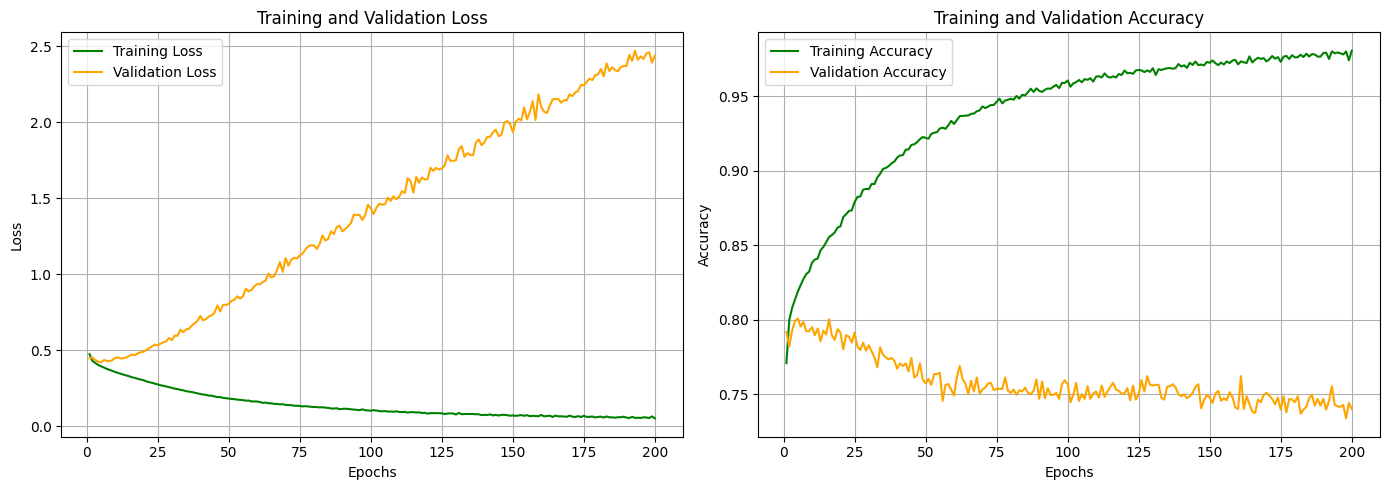

In [109]:
model, history = entrenament_perceptro2(X_train, y_train)
evaluacio_mlp(X_test, y_test, model, history)

Massa sobreajust

MODEL 3

MODEL 4

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1_l2

def entrenament_perceptro3(X_train, y_train):
    model = Sequential([
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        Dense(2, activation='softmax')
    ])
    optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    num_epochs = 200
    batch_size = 16
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=2)

    return model, history

Epoch 1/200
1251/1251 - 1s - 973us/step - accuracy: 0.7602 - loss: 0.8819 - val_accuracy: 0.7751 - val_loss: 0.5587
Epoch 2/200
1251/1251 - 1s - 487us/step - accuracy: 0.7740 - loss: 0.5626 - val_accuracy: 0.7683 - val_loss: 0.5464
Epoch 3/200
1251/1251 - 1s - 481us/step - accuracy: 0.7734 - loss: 0.5586 - val_accuracy: 0.7602 - val_loss: 0.5976
Epoch 4/200
1251/1251 - 1s - 481us/step - accuracy: 0.7728 - loss: 0.5584 - val_accuracy: 0.7755 - val_loss: 0.5414
Epoch 5/200
1251/1251 - 1s - 479us/step - accuracy: 0.7747 - loss: 0.5552 - val_accuracy: 0.7665 - val_loss: 0.5565
Epoch 6/200
1251/1251 - 1s - 474us/step - accuracy: 0.7731 - loss: 0.5548 - val_accuracy: 0.7539 - val_loss: 0.5829
Epoch 7/200
1251/1251 - 1s - 488us/step - accuracy: 0.7724 - loss: 0.5563 - val_accuracy: 0.7386 - val_loss: 0.5985
Epoch 8/200
1251/1251 - 1s - 483us/step - accuracy: 0.7715 - loss: 0.5555 - val_accuracy: 0.7211 - val_loss: 0.6108
Epoch 9/200
1251/1251 - 1s - 478us/step - accuracy: 0.7714 - loss: 0.553

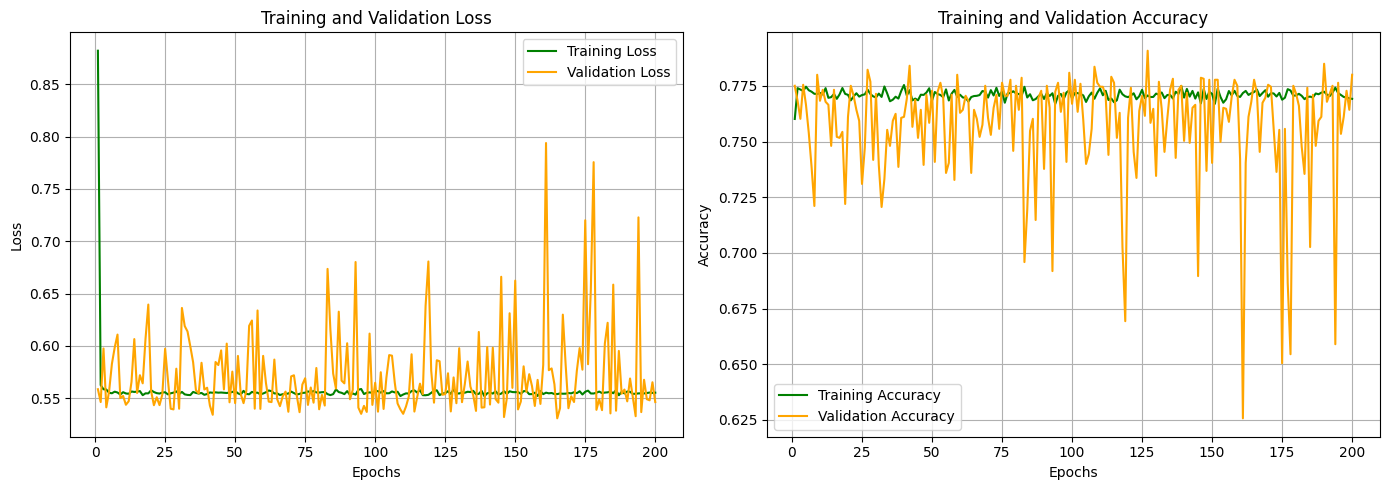

In [111]:
model, history = entrenament_perceptro3(X_train, y_train)
evaluacio_mlp(X_test, y_test, model, history)

In [103]:
def entrenament_perceptroaksgf(X_train, y_train):
    model = Sequential([
        Dense(16, activation='relu'),
        Dense(2, activation='softmax')
    ])
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    num_epochs = 200
    batch_size = 16
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=2)

    return model, history

Epoch 1/200
1251/1251 - 1s - 910us/step - accuracy: 0.7591 - loss: 0.4988 - val_accuracy: 0.7782 - val_loss: 0.4559
Epoch 2/200
1251/1251 - 1s - 492us/step - accuracy: 0.7902 - loss: 0.4424 - val_accuracy: 0.7823 - val_loss: 0.4449
Epoch 3/200
1251/1251 - 1s - 479us/step - accuracy: 0.7954 - loss: 0.4327 - val_accuracy: 0.7850 - val_loss: 0.4350
Epoch 4/200
1251/1251 - 1s - 476us/step - accuracy: 0.7974 - loss: 0.4281 - val_accuracy: 0.7926 - val_loss: 0.4312
Epoch 5/200
1251/1251 - 1s - 511us/step - accuracy: 0.8009 - loss: 0.4244 - val_accuracy: 0.7845 - val_loss: 0.4310
Epoch 6/200
1251/1251 - 1s - 487us/step - accuracy: 0.8026 - loss: 0.4227 - val_accuracy: 0.7908 - val_loss: 0.4296
Epoch 7/200
1251/1251 - 1s - 477us/step - accuracy: 0.8031 - loss: 0.4209 - val_accuracy: 0.7917 - val_loss: 0.4269
Epoch 8/200
1251/1251 - 1s - 474us/step - accuracy: 0.8040 - loss: 0.4190 - val_accuracy: 0.7935 - val_loss: 0.4253
Epoch 9/200
1251/1251 - 1s - 483us/step - accuracy: 0.8073 - loss: 0.417

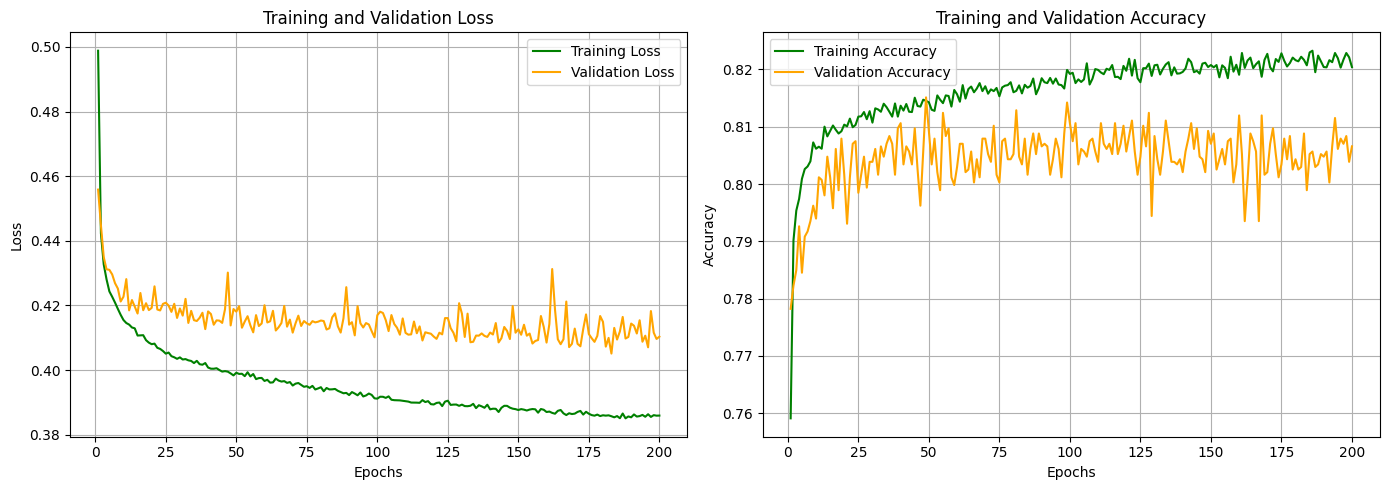

In [63]:
model, history = entrenament_perceptroaksgf(X_train, y_train)
evaluacio_mlp(X_test, y_test, model, history)

Epoch 1/200
1251/1251 - 2s - loss: 0.4933 - accuracy: 0.7597 - val_loss: 0.4516 - val_accuracy: 0.7737 - 2s/epoch - 2ms/step
Epoch 2/200
1251/1251 - 2s - loss: 0.4447 - accuracy: 0.7873 - val_loss: 0.4408 - val_accuracy: 0.7886 - 2s/epoch - 1ms/step
Epoch 3/200
1251/1251 - 2s - loss: 0.4359 - accuracy: 0.7915 - val_loss: 0.4343 - val_accuracy: 0.7877 - 2s/epoch - 1ms/step
Epoch 4/200
1251/1251 - 2s - loss: 0.4322 - accuracy: 0.7956 - val_loss: 0.4300 - val_accuracy: 0.7944 - 2s/epoch - 1ms/step
Epoch 5/200
1251/1251 - 2s - loss: 0.4281 - accuracy: 0.7978 - val_loss: 0.4301 - val_accuracy: 0.7913 - 2s/epoch - 1ms/step
Epoch 6/200
1251/1251 - 2s - loss: 0.4258 - accuracy: 0.7995 - val_loss: 0.4249 - val_accuracy: 0.7976 - 2s/epoch - 1ms/step
Epoch 7/200
1251/1251 - 2s - loss: 0.4241 - accuracy: 0.8016 - val_loss: 0.4255 - val_accuracy: 0.7922 - 2s/epoch - 1ms/step
Epoch 8/200
1251/1251 - 2s - loss: 0.4224 - accuracy: 0.8011 - val_loss: 0.4293 - val_accuracy: 0.8012 - 2s/epoch - 1ms/step


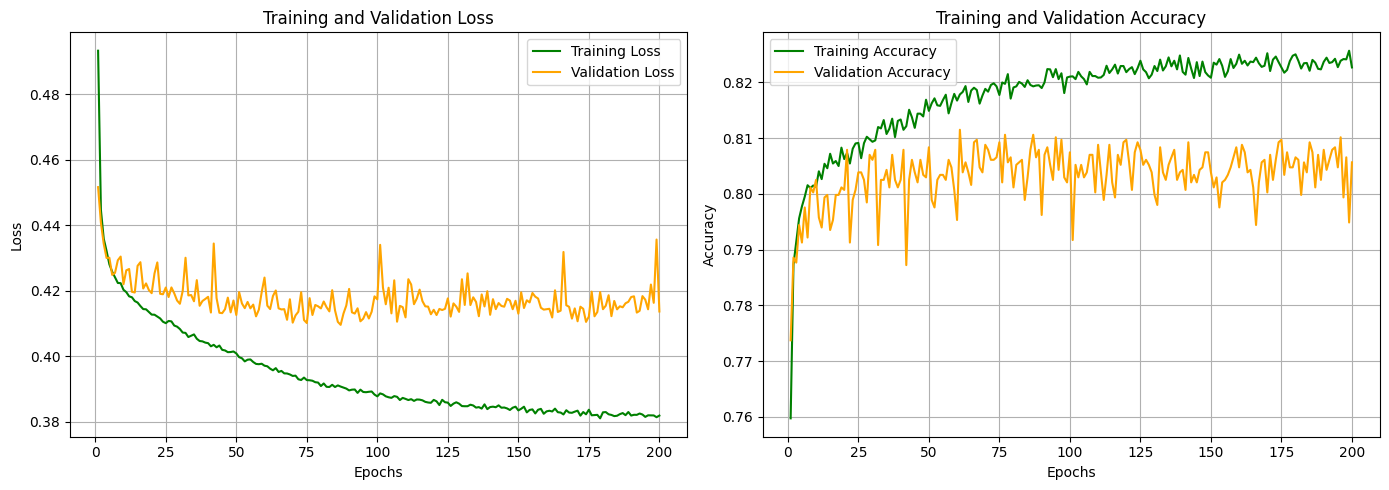

Test F1 Score: 0.8074736996507743
Test Recall: 0.8076121138794792


In [104]:
model, history = entrenament_perceptroaksgf(X_train, y_train)
evaluacio_mlp(X_test, y_test, model, history)

MODEL 4

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

def entrenament_perceptro4(X_train, y_train):
    model = Sequential()
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))  # Capa oculta amb regularització L2
    model.add(Dense(2, activation='softmax'))
    
    learning_rate = 0.001
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    num_epochs = 200
    batch_size = 16
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=2)

    return model, history



Epoch 1/200
1251/1251 - 1s - 998us/step - accuracy: 0.7535 - loss: 0.5222 - val_accuracy: 0.7751 - val_loss: 0.4727
Epoch 2/200
1251/1251 - 1s - 488us/step - accuracy: 0.7889 - loss: 0.4612 - val_accuracy: 0.7913 - val_loss: 0.4572
Epoch 3/200
1251/1251 - 1s - 483us/step - accuracy: 0.7939 - loss: 0.4510 - val_accuracy: 0.7863 - val_loss: 0.4505
Epoch 4/200
1251/1251 - 1s - 468us/step - accuracy: 0.7978 - loss: 0.4454 - val_accuracy: 0.7836 - val_loss: 0.4476
Epoch 5/200
1251/1251 - 1s - 467us/step - accuracy: 0.7967 - loss: 0.4419 - val_accuracy: 0.7836 - val_loss: 0.4498
Epoch 6/200
1251/1251 - 1s - 469us/step - accuracy: 0.8003 - loss: 0.4393 - val_accuracy: 0.7899 - val_loss: 0.4442
Epoch 7/200
1251/1251 - 1s - 468us/step - accuracy: 0.7997 - loss: 0.4363 - val_accuracy: 0.7985 - val_loss: 0.4435
Epoch 8/200
1251/1251 - 1s - 466us/step - accuracy: 0.8016 - loss: 0.4340 - val_accuracy: 0.7962 - val_loss: 0.4432
Epoch 9/200
1251/1251 - 1s - 476us/step - accuracy: 0.8039 - loss: 0.432

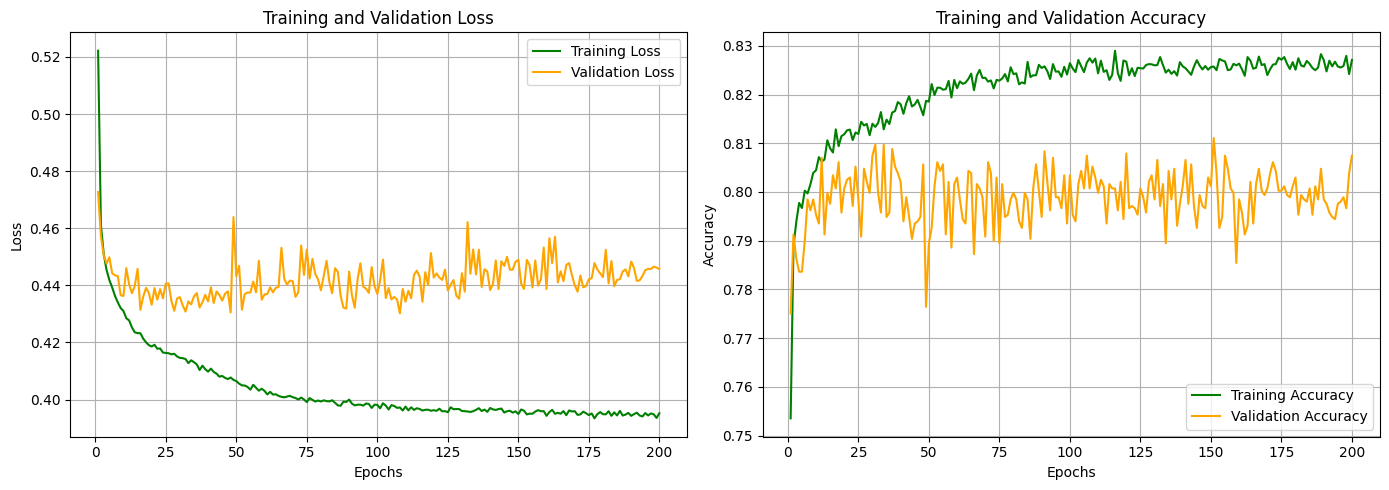

In [113]:
model, history = entrenament_perceptro4(X_train, y_train)
evaluacio_mlp(X_test, y_test, model, history)

In [58]:
def entrenament_perceptro_final(X_train, y_train):
    
    model = Sequential([
        Dense(2, activation='softmax')
    ])
    learning_rate = 0.0001
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    num_epochs = 150
    batch_size = 32
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=2)

    return model, history

Epoch 1/150


626/626 - 1s - 1ms/step - accuracy: 0.4623 - loss: 0.8002 - val_accuracy: 0.4651 - val_loss: 0.7485
Epoch 2/150
626/626 - 0s - 490us/step - accuracy: 0.4897 - loss: 0.7239 - val_accuracy: 0.5290 - val_loss: 0.7001
Epoch 3/150
626/626 - 0s - 481us/step - accuracy: 0.5656 - loss: 0.6824 - val_accuracy: 0.6082 - val_loss: 0.6637
Epoch 4/150
626/626 - 0s - 472us/step - accuracy: 0.6253 - loss: 0.6501 - val_accuracy: 0.6608 - val_loss: 0.6351
Epoch 5/150
626/626 - 0s - 464us/step - accuracy: 0.6666 - loss: 0.6246 - val_accuracy: 0.6811 - val_loss: 0.6122
Epoch 6/150
626/626 - 0s - 460us/step - accuracy: 0.6880 - loss: 0.6038 - val_accuracy: 0.6941 - val_loss: 0.5936
Epoch 7/150
626/626 - 0s - 465us/step - accuracy: 0.7022 - loss: 0.5867 - val_accuracy: 0.7027 - val_loss: 0.5784
Epoch 8/150
626/626 - 0s - 496us/step - accuracy: 0.7111 - loss: 0.5724 - val_accuracy: 0.7135 - val_loss: 0.5657
Epoch 9/150
626/626 - 0s - 473us/step - accuracy: 0.7193 - loss: 0.5603 - val_accuracy: 0.7202 - val_l

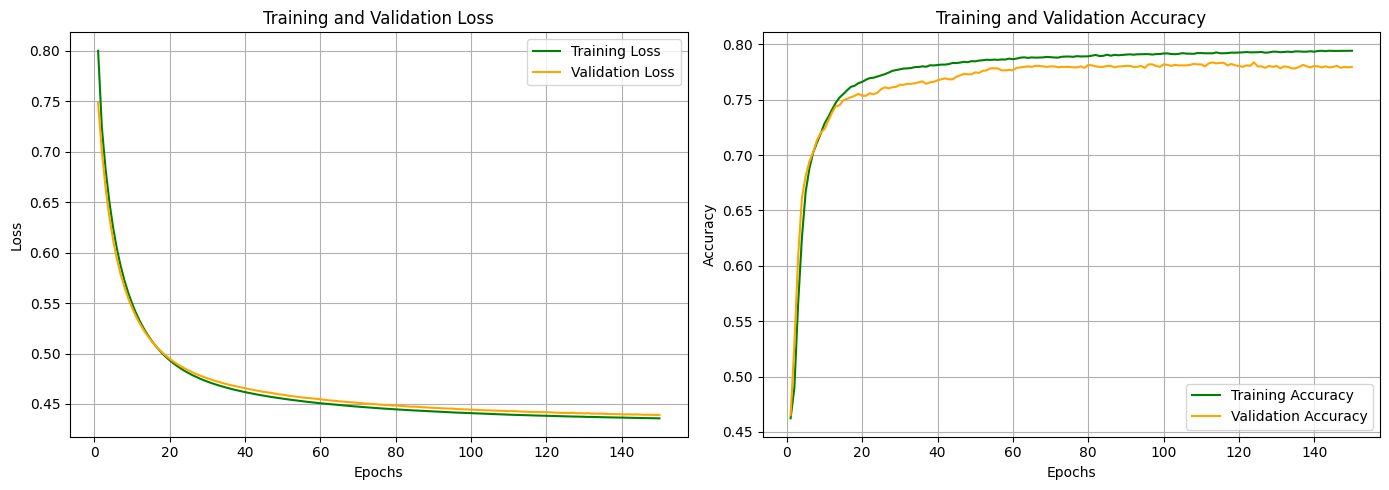

In [59]:
model, history = entrenament_perceptro_final(X_train, y_train)
evaluacio_mlp(X_test, y_test, model, history)

FUNCIÓ GENERALITZAR ENTRENAMENT PERCEPTRO MULTICAPA

In [ ]:
layers_info = [
    {'neurons': 64, 'activation': 'relu', 'regularizer': {'l1': 0.01, 'l2': 0.01}},
    {'neurons': 32, 'activation': 'relu', 'regularizer': {'l1': 0.01, 'l2': 0.01}},
    {'neurons': 2, 'activation': 'softmax'}
]

# Activació pot ser relu o sigmoide
# Optimizer por ser Adam o SDG

# Configuración del optimizador
optimizer_info = {
    'type': 'adam',
    'learning_rate': 0.001
}

model, history = entrenamiento_perceptron_multicapa(X_train, y_train, layers_info, optimizer_info, num_epochs=200, batch_size=16)


MODEL GUANYADOR


Fer una taula comparativa amb tots els models testejats, explicant el model que creieu
que millor aborda al problema que esteu intentant resoldre. Finalment, detalleu quins
s ́on els problemes que heu trobat aix ́ı com les conclusions que extraieu.